# Import necessarry Library

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.patches as patches
from pathlib import Path

# 1. Image Read

In [3]:
'''Image Read'''
def read_image(path):
    im = cv2.imread(str(path))
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

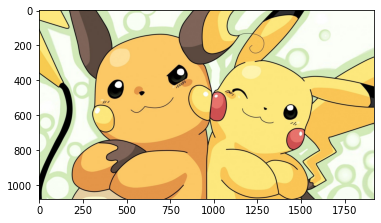

In [4]:
im = read_image('/home/kawsar/Desktop/Deep Learning/helper-python-scripts/Images/pikachu.jpg')
plt.imshow(im)
plt.show()

# 2. Crop Image

In [8]:
'''Image Cropping'''
def center_crop(im, crop_pixels = 50):
    return im[crop_pixels:im.shape[0] - crop_pixels, crop_pixels+500:im.shape[1] - crop_pixels-500]

(980, 820, 3)


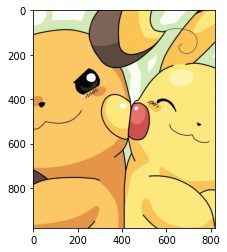

In [9]:
cropped = center_crop(im)
print(cropped.shape)
plt.imshow(cropped)
plt.show()

In [11]:
def random_crop(im, row_crop_pix = 20):
    rows, cols, _ = im.shape
    cols_crop_pix = round(row_crop_pix*cols/rows)
    row_crop_pix = int(np.floor(2*random.uniform(0, 1)*row_crop_pix))
    cols_crop_pix = int(np.floor(2*random.uniform(0, 1)*cols_crop_pix).astype(int))
    return im[row_crop_pix:rows - row_crop_pix, cols_crop_pix:cols - cols_crop_pix]


(1076, 1856, 3)


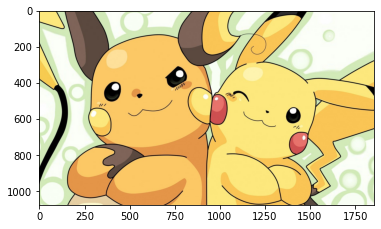

In [13]:
random_cropped = random_crop(im)
print(random_cropped.shape)
plt.imshow(random_cropped)
plt.show()

# 3. Resizing

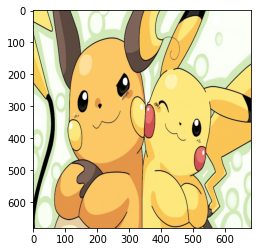

In [15]:
resized = cv2.resize(im, (680,680))
plt.imshow(resized)

# 4. Flip image

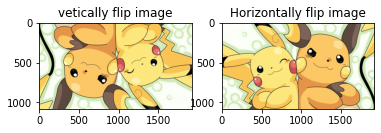

In [31]:
#vertically flip image

plt.subplot(1,2,1)
plt.title('vetically flip image')
flip_v = np.flip(im,0)
plt.imshow(flip_v)

#Horizontally flip image
plt.subplot(1,2,2)
plt.title('Horizontally flip image')

flip_h = np.flip(im,1)
plt.imshow(flip_h)

# 5. Rotate image

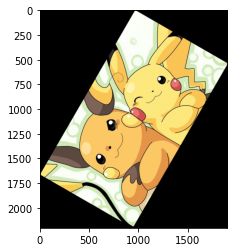

In [33]:
from scipy import ndimage
rotated = ndimage.rotate(im, 60)
plt.imshow(rotated)

## Affine transformation with border filling


In [34]:
def affine_img(img, angle):
    rows, columns, _ = img.shape
    M = cv2.getRotationMatrix2D((rows/2,columns/2),angle,1) #Calculates an affine matrix of 2D rotation.
    return cv2.warpAffine(img,M,(columns,rows), borderMode=cv2.BORDER_REFLECT, 
                          flags=cv2.INTER_NEAREST)

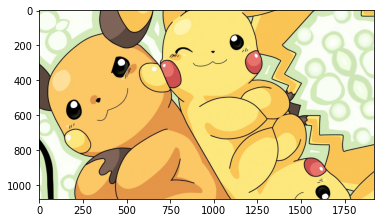

In [35]:
rotated = affine_img(im, 30)
plt.imshow(rotated)

## Affine transformation with border filling

In [36]:
def affine_img(img, angle):
    rows, columns, _ = img.shape
    M = cv2.getRotationMatrix2D((rows/2,columns/2),angle,1) #Calculates an affine matrix of 2D rotation.
    return cv2.warpAffine(img,M,(columns,rows), borderMode=cv2.BORDER_REFLECT, 
                          flags=cv2.INTER_NEAREST)

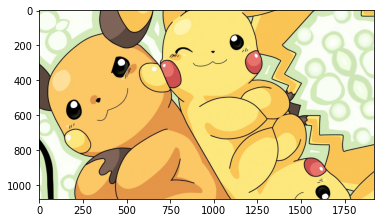

In [37]:
rotated = affine_img(im, 30)
plt.imshow(rotated)

# 6. Change Brightness and Contrast

In [62]:
def bright_contrast_loop (image, alpha=1, beta=0):
    new_image = np.zeros(image.shape, image.dtype)
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            for c in range(image.shape[2]):
                new_image[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)
    return new_image

In [63]:
contrast_im = bright_contrast_loop(im,alpha=1.5)
plt.imshow(contrast_im)

KeyboardInterrupt: 

###  Changing birghtness and contrast using library function

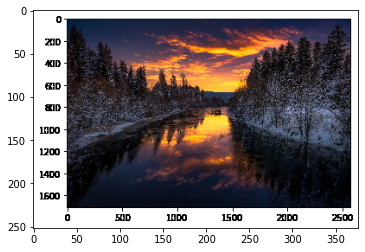

In [69]:
im = read_image('/home/kawsar/Desktop/Deep Learning/helper-python-scripts/Images/download.png')
plt.imshow(im)

In [70]:
def bright_contrast (image, alpha=1, beta=0):
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

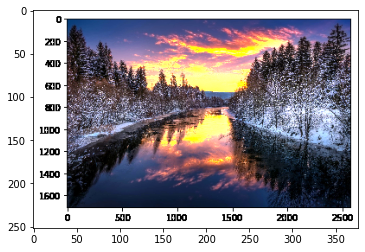

In [71]:
contrast_im = bright_contrast(im, alpha=2)
plt.imshow(contrast_im)

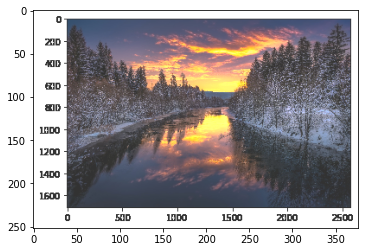

In [72]:
brighter_im = bright_contrast(im, beta=50)
plt.imshow(brighter_im)

# 6. Bounding Box

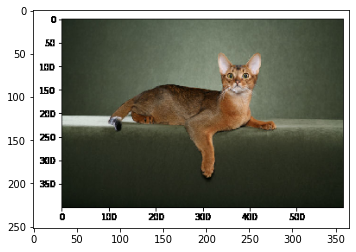

In [73]:
import os
path = '/home/kawsar/Desktop/Deep Learning/helper-python-scripts/Images'
img_path = os.path.join(path,'cat.png')
im = read_image(img_path)
plt.imshow(im)

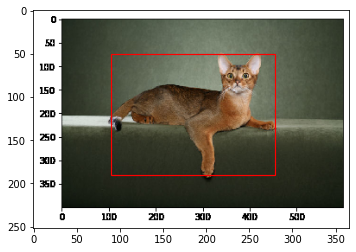

In [86]:
xmin = 90
ymin= 50
xmax = 280
ymax = 190

fig,ax = plt.subplots(1)
ax.imshow(im)
#make rectangular bounding box
bb = patches.Rectangle(xy=(xmin,ymin),width=xmax-xmin,height=ymax-ymin,linewidth=1.2,edgecolor='r',facecolor='none')
ax.add_patch(bb) #add bounding box to image
plt.show()

# 8. Showing multiple images in a grid

In [91]:
image_paths = list(Path('/home/kawsar/Desktop/Deep Learning/helper-python-scripts/Images').iterdir())
#print(image_paths)
images = [read_image(p) for p in image_paths]

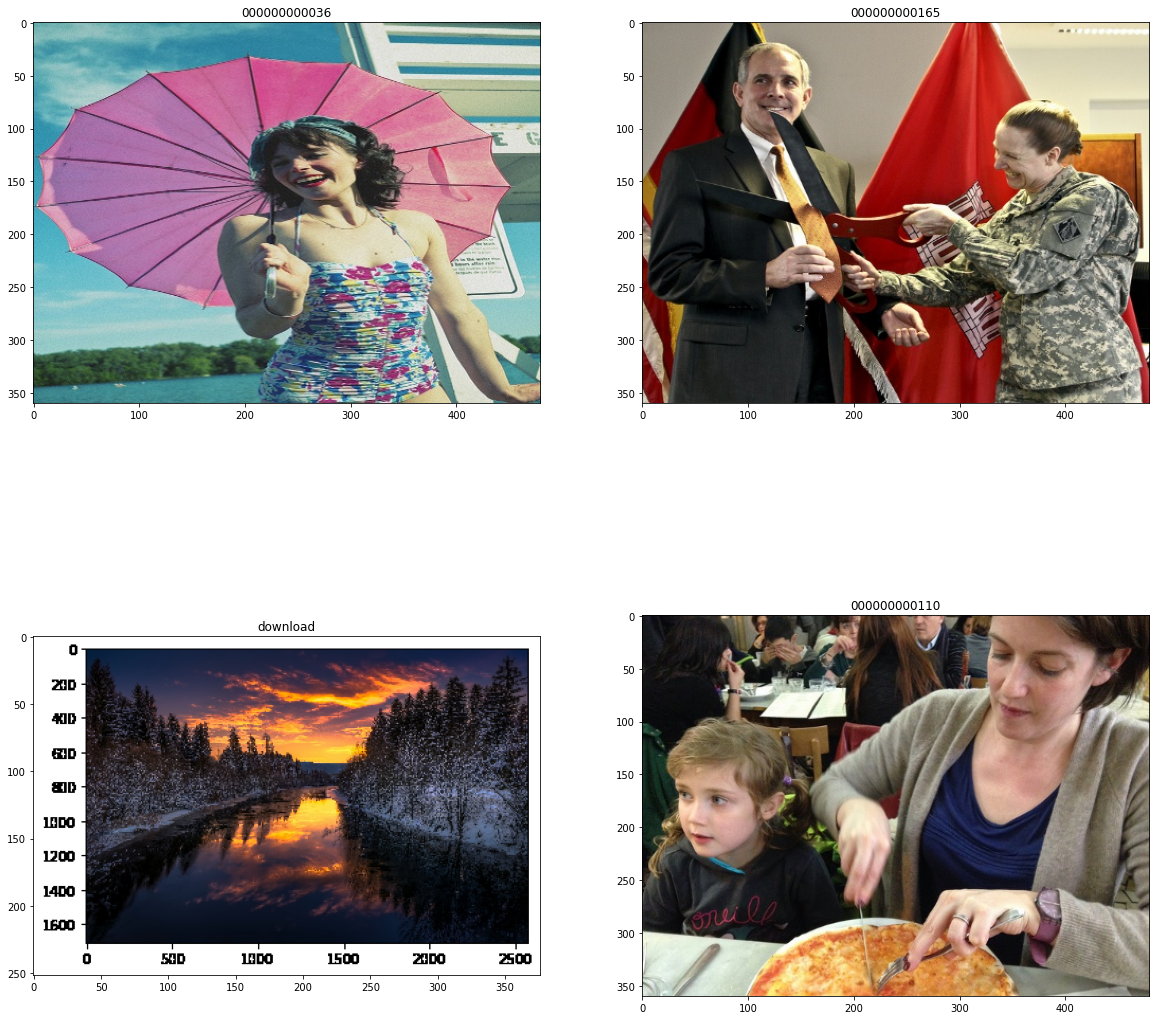

In [92]:
fig = plt.figure(figsize=(20, 20))
columns = 2
rows = 2

pics = []
for i in range(columns*rows):
    pics.append(fig.add_subplot(rows, columns, i+1,title=image_paths[i].parts[-1].split('.')[0]))
    plt.imshow(images[i])

plt.show() 

# 9. Convert to black and white 

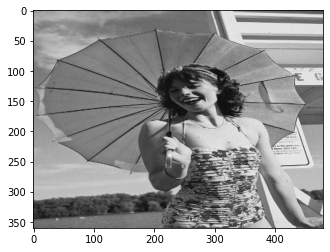

In [93]:
from skimage import color
from skimage import io

img = color.rgb2gray(io.imread(str(image_paths[0])))
plt.imshow(img,cmap = plt.cm.gray)

# 10. Blur

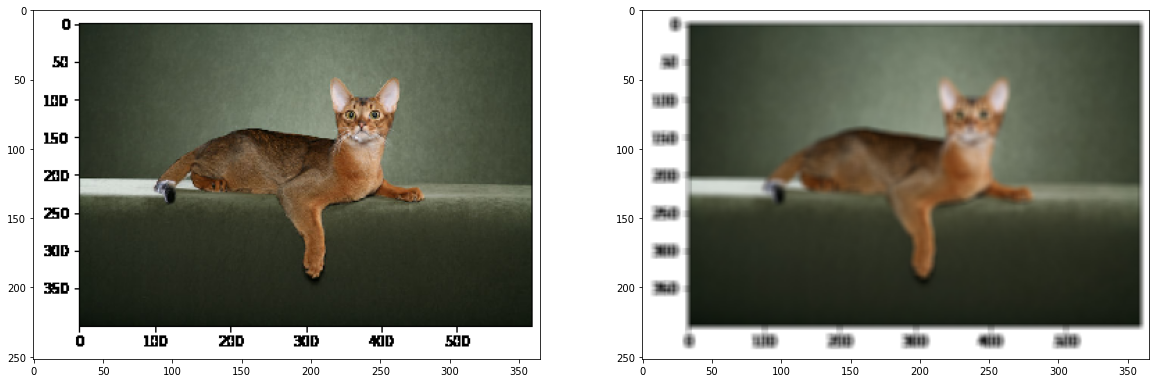

In [94]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

path = '/home/kawsar/Desktop/Deep Learning/helper-python-scripts/Images'
img_path = os.path.join(path,'cat.png')

im = read_image(img_path)
blur = cv2.blur(im,(5,5))
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(im)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(blur)